# Solar Radiation Prediction Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


#### Importing dataset

In [ ]:
Solar_orig=pd.read_csv(r'/content/solar_train.csv')
solar = Solar_orig.copy()
print(solar.shape)
solar.head()

(26148, 12)


,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation
0,4152,1473879005,9/14/2016 12:00:00 AM,08:50:05,57,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04
1,13047,1476293121,10/12/2016 12:00:00 AM,07:25:21,50,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37
2,7420,1477993220,10/31/2016 12:00:00 AM,23:40:20,47,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29
3,6508,1473013505,9/4/2016 12:00:00 AM,08:25:05,57,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75
4,29110,1481885434,12/16/2016 12:00:00 AM,00:50:34,41,30.23,103,177.55,2.25,06:50:00,17:46:00,1.22


In [ ]:
solar.drop(columns=['Id','UNIXTime'],inplace=True)

# Since we have time and date, we donot need UNIX time

In [ ]:
solar.head()

,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation
0,9/14/2016 12:00:00 AM,08:50:05,57,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04
1,10/12/2016 12:00:00 AM,07:25:21,50,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37
2,10/31/2016 12:00:00 AM,23:40:20,47,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29
3,9/4/2016 12:00:00 AM,08:25:05,57,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75
4,12/16/2016 12:00:00 AM,00:50:34,41,30.23,103,177.55,2.25,06:50:00,17:46:00,1.22


In [ ]:
solar.info()

# As observed there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26148 entries, 0 to 26147
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    26148 non-null  object 
 1   Time                    26148 non-null  object 
 2   Temperature             26148 non-null  int64  
 3   Pressure                26148 non-null  float64
 4   Humidity                26148 non-null  int64  
 5   WindDirection(Degrees)  26148 non-null  float64
 6   Speed                   26148 non-null  float64
 7   TimeSunRise             26148 non-null  object 
 8   TimeSunSet              26148 non-null  object 
 9   Radiation               26148 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 2.0+ MB


In [ ]:
solar.describe()

#It looks like there might be outliers in WindDirection(Degrees), Speed and Radiation

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Radiation
count,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000
mean,51.104865,30.422835,75.005239,143.259970,6.248521,208.044780
std,6.213912,0.054724,25.993102,82.988177,3.484166,316.090247
min,34.000000,30.190000,11.000000,0.090000,0.000000,1.130000
25%,46.000000,30.400000,56.000000,81.977500,3.370000,1.230000
50%,50.000000,30.430000,85.000000,147.645000,5.620000,2.710000
75%,55.000000,30.460000,97.000000,179.220000,7.870000,358.945000
max,71.000000,30.560000,103.000000,359.950000,39.370000,1601.260000


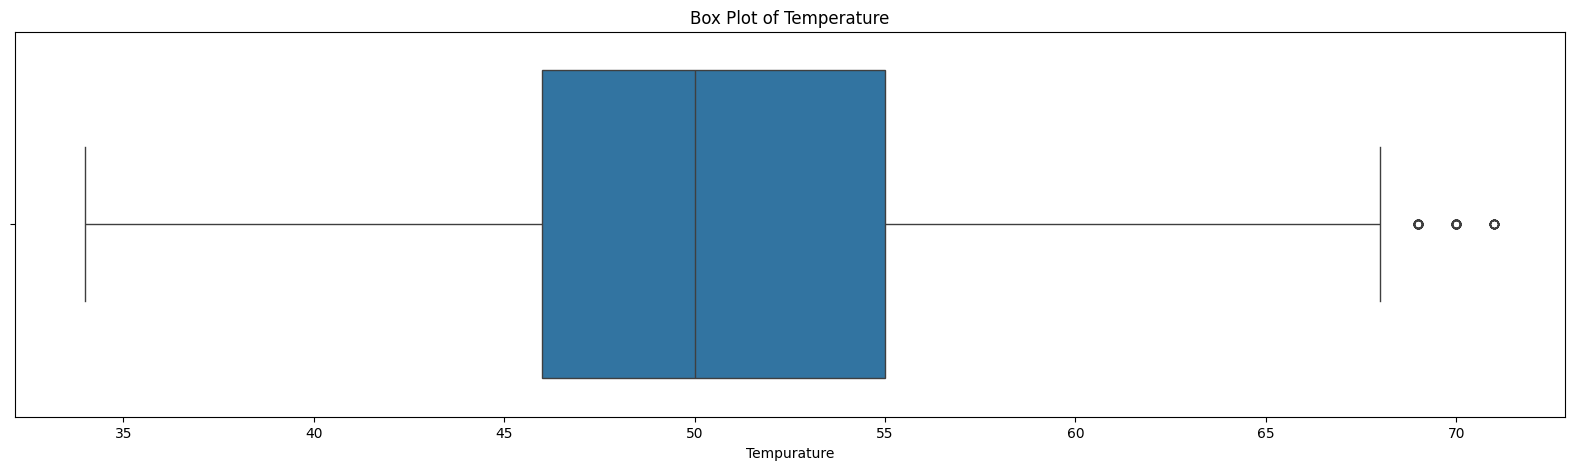

In [ ]:
# Checking for outliers in Temperature column

plt.figure(figsize=(20,5))
sns.boxplot(x = solar['Temperature'])
plt.title('Box Plot of Temperature')
plt.xlabel('Tempurature')
plt.show()

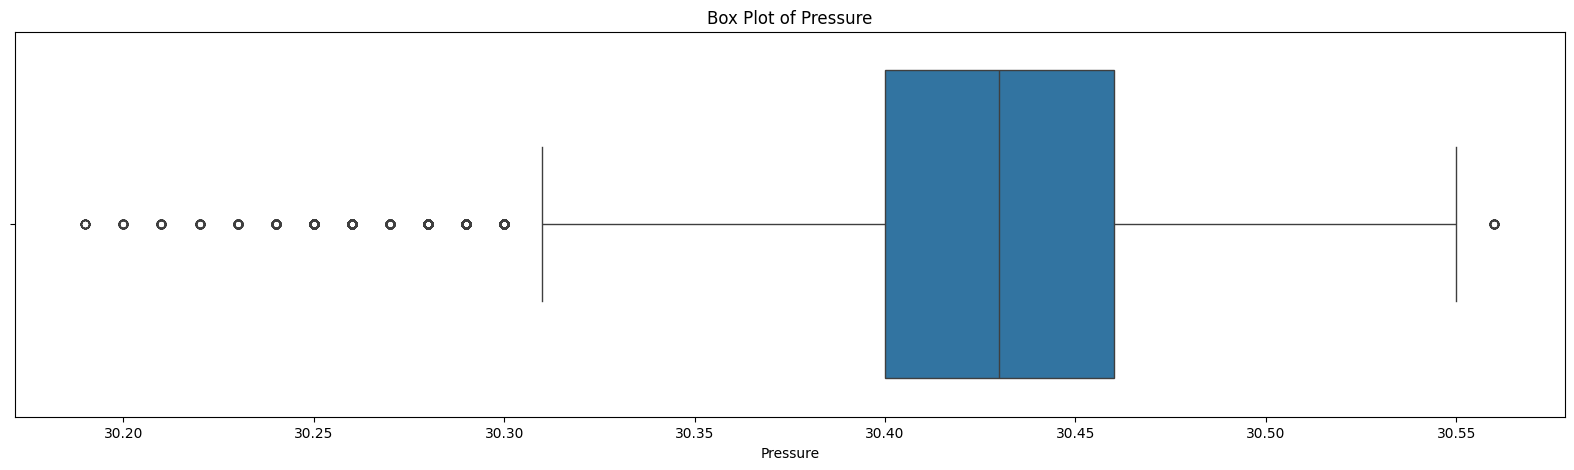

In [ ]:
# Checking for outliers in Pressure column

plt.figure(figsize=(20,5))
sns.boxplot(x = solar['Pressure'])
plt.title('Box Plot of Pressure')
plt.xlabel('Pressure')
plt.show()

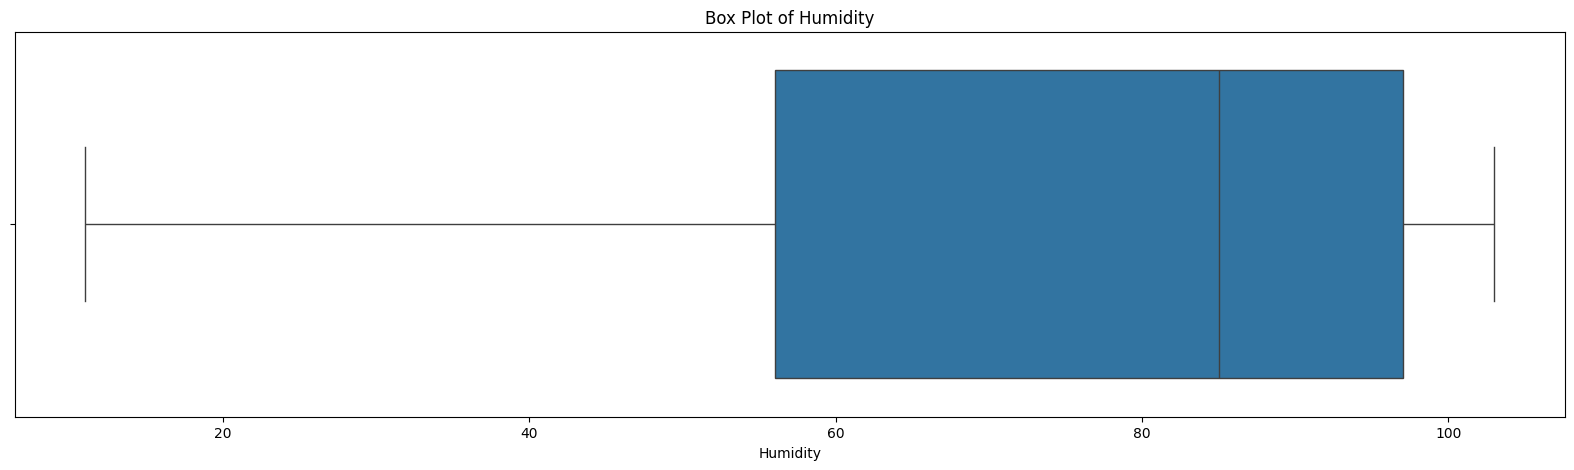

In [ ]:
# Checking for outliers in Humidity column

plt.figure(figsize=(20,5))
sns.boxplot(x = solar['Humidity'])
plt.title('Box Plot of Humidity')
plt.xlabel('Humidity')
plt.show()

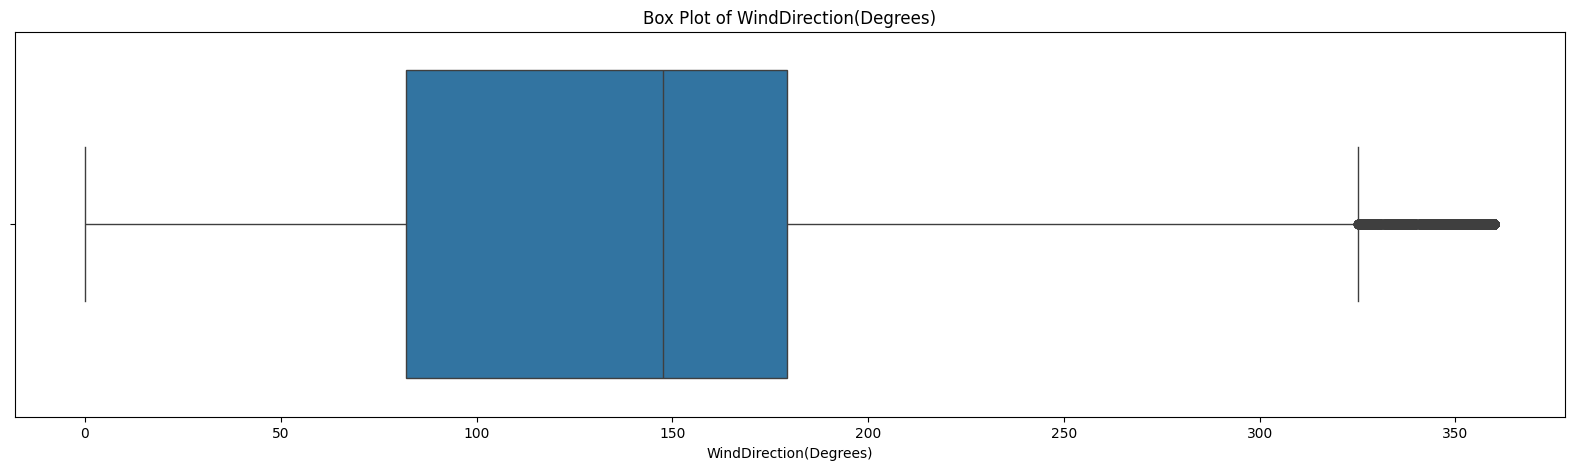

In [ ]:
# Checking for outliers in Wind Direction column

plt.figure(figsize=(20,5))
sns.boxplot(x = solar['WindDirection(Degrees)'])
plt.title('Box Plot of WindDirection(Degrees)')
plt.xlabel('WindDirection(Degrees)')
plt.show()

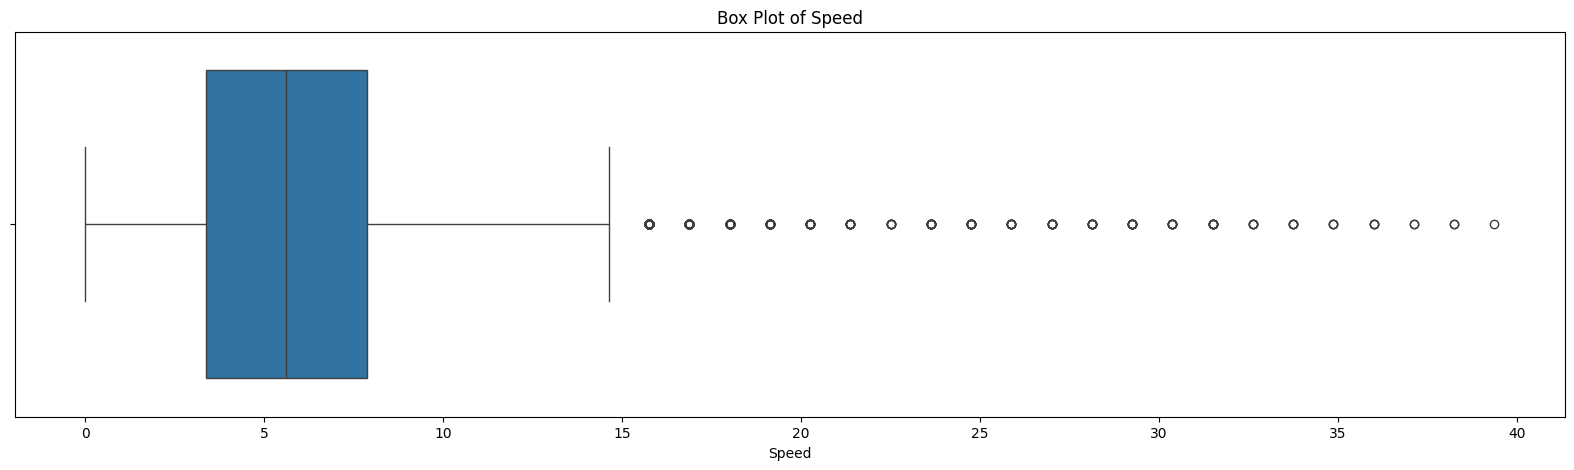

In [ ]:
# Checking for outliers in Speed column

plt.figure(figsize=(20,5))
sns.boxplot(x = solar['Speed'])
plt.title('Box Plot of Speed')
plt.xlabel('Speed')
plt.show()

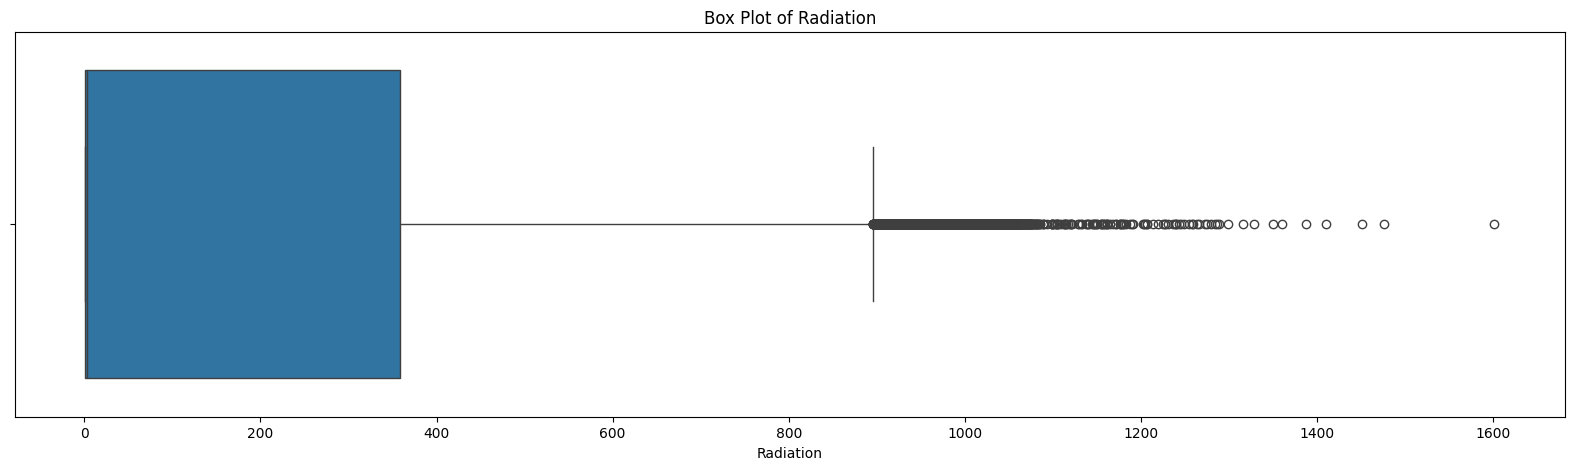

In [ ]:
# Checking for outliers in Radiation column

plt.figure(figsize=(20,5))
sns.boxplot(x = solar['Radiation'])
plt.title('Box Plot of Radiation')
plt.xlabel('Radiation')
plt.show()

In [ ]:
# As observed from above box plots, there are outliers in columns Radiation, Speed, WindDirection,Pressure and Temperature

In [ ]:
# Getting outlier limits for above mentioned columns

num_cols_solar = solar[['Radiation','Speed','WindDirection(Degrees)','Pressure','Temperature']]
Q1 = num_cols_solar.quantile(0.25)
Q3 = num_cols_solar.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('lower bounds are:\n',lower_bound)
print('-'*70)
print('upper bounds are:\n',upper_bound)

lower bounds are:
 Radiation                -535.34250
Speed                      -3.38000
WindDirection(Degrees)    -63.88625
Pressure                   30.31000
Temperature                32.50000
dtype: float64
----------------------------------------------------------------------
upper bounds are:
 Radiation                 895.51750
Speed                      14.62000
WindDirection(Degrees)    325.08375
Pressure                   30.55000
Temperature                68.50000
dtype: float64


In [ ]:
#Checking the count of outliers

for x in num_cols_solar.columns:
    print('column is:',x)
    print('min side outliers count is:')
    print(solar[solar[x] < lower_bound[x]][x].count())
    print('max side outliers count is:')
    print(solar[solar[x] > upper_bound[x]][x].count())
    print('-'*40)

column is: Radiation
min side outliers count is:
0
max side outliers count is:
1426
----------------------------------------
column is: Speed
min side outliers count is:
0
max side outliers count is:
382
----------------------------------------
column is: WindDirection(Degrees)
min side outliers count is:
0
max side outliers count is:
1259
----------------------------------------
column is: Pressure
min side outliers count is:
1310
max side outliers count is:
26
----------------------------------------
column is: Temperature
min side outliers count is:
0
max side outliers count is:
76
----------------------------------------


In [ ]:
# Removing the outliers

for x in num_cols_solar.columns:
    solar.loc[solar[x] > upper_bound[x],x] = upper_bound[x]

solar.loc[solar['Pressure'] < lower_bound['Pressure'],'Pressure'] = lower_bound['Pressure']

In [ ]:
# Checking for outliers again

num_cols_solar = solar[['Radiation','Speed','WindDirection(Degrees)','Pressure','Temperature']]
Q1 = num_cols_solar.quantile(0.25)
Q3 = num_cols_solar.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('lower bounds are:\n',lower_bound)
print('-'*70)
print('upper bounds are:\n',upper_bound)

lower bounds are:
 Radiation                -535.34250
Speed                      -3.38000
WindDirection(Degrees)    -63.88625
Pressure                   30.31000
Temperature                32.50000
dtype: float64
----------------------------------------------------------------------
upper bounds are:
 Radiation                 895.51750
Speed                      14.62000
WindDirection(Degrees)    325.08375
Pressure                   30.55000
Temperature                68.50000
dtype: float64


In [ ]:
# Checking the count of outliers

for x in num_cols_solar.columns:
    print('column is:',x)
    print('min side outliers count is:')
    print(solar[solar[x] < lower_bound[x]][x].count())
    print('max side outliers count is:')
    print(solar[solar[x] > upper_bound[x]][x].count())
    print('-'*40)

# From observing below output, there are no outliers

column is: Radiation
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: Speed
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: WindDirection(Degrees)
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: Pressure
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: Temperature
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------


In [ ]:
# Splitting data column to date and time

solar[['Date','12','AM']] = solar['Data'].str.split(' ',expand=True)
solar.drop(columns=['12','AM'],inplace=True)

In [ ]:
# Dropping Data column

solar.drop(columns=['Data'],inplace=True)

In [ ]:
solar.head()

,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,Date
0,08:50:05,57.0,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04,9/14/2016
1,07:25:21,50.0,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37,10/12/2016
2,23:40:20,47.0,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29,10/31/2016
3,08:25:05,57.0,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75,9/4/2016
4,00:50:34,41.0,30.31,103,177.55,2.25,06:50:00,17:46:00,1.22,12/16/2016


In [ ]:
solar.info()
# Data type of column Date, Time has to be changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26148 entries, 0 to 26147
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    26148 non-null  object 
 1   Temperature             26148 non-null  float64
 2   Pressure                26148 non-null  float64
 3   Humidity                26148 non-null  int64  
 4   WindDirection(Degrees)  26148 non-null  float64
 5   Speed                   26148 non-null  float64
 6   TimeSunRise             26148 non-null  object 
 7   TimeSunSet              26148 non-null  object 
 8   Radiation               26148 non-null  float64
 9   Date                    26148 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 2.0+ MB


In [ ]:
# Changing Date to date time data type

solar['Date'] = pd.to_datetime(solar['Date'])

In [ ]:
# Changing Time, TimeSunRise and TimeSunSet to date time format

solar['Time'] = pd.to_datetime(solar['Time'], format='%H:%M:%S').dt.time
solar['TimeSunRise'] = pd.to_datetime(solar['TimeSunRise'], format='%H:%M:%S').dt.time
solar['TimeSunSet'] = pd.to_datetime(solar['TimeSunSet'], format='%H:%M:%S').dt.time

In [ ]:
solar.head()

,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,Date
0,08:50:05,57.0,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04,2016-09-14
1,07:25:21,50.0,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37,2016-10-12
2,23:40:20,47.0,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29,2016-10-31
3,08:25:05,57.0,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75,2016-09-04
4,00:50:34,41.0,30.31,103,177.55,2.25,06:50:00,17:46:00,1.22,2016-12-16


In [ ]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26148 entries, 0 to 26147
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Time                    26148 non-null  object        
 1   Temperature             26148 non-null  float64       
 2   Pressure                26148 non-null  float64       
 3   Humidity                26148 non-null  int64         
 4   WindDirection(Degrees)  26148 non-null  float64       
 5   Speed                   26148 non-null  float64       
 6   TimeSunRise             26148 non-null  object        
 7   TimeSunSet              26148 non-null  object        
 8   Radiation               26148 non-null  float64       
 9   Date                    26148 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 2.0+ MB


<ipython-input-30-fafec139a970>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  solar_corr = sns.heatmap(solar.corr(),annot=True,cmap ="YlGnBu",linewidths = 0.1)


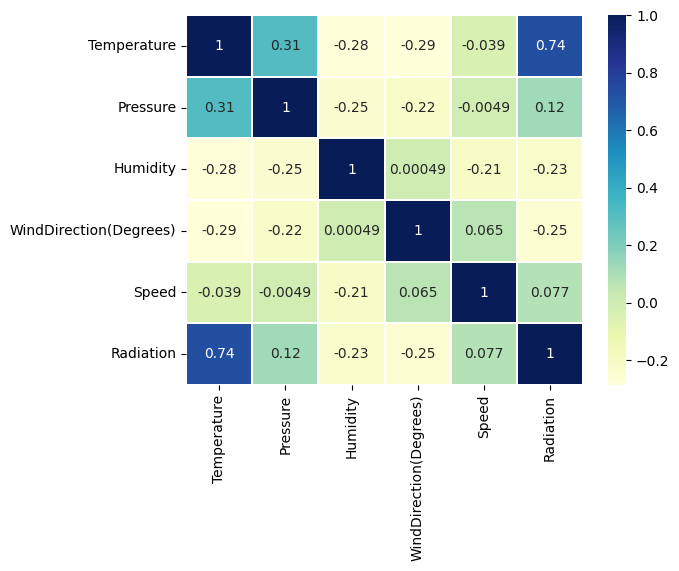

In [ ]:
solar_corr = sns.heatmap(solar.corr(),annot=True,cmap ="YlGnBu",linewidths = 0.1)

# Correlation between any of the independent variables is not high.

### EDA

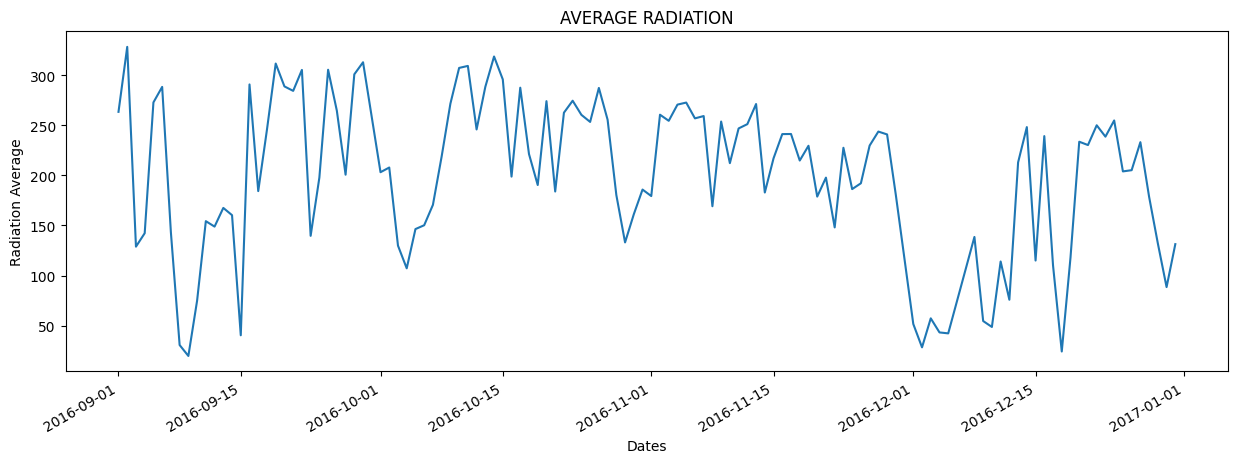

In [ ]:
# Check variation of average radiation with the dates

plt.figure(figsize=(15,5))
time_radiation = solar.groupby(by='Date')['Radiation'].mean()
time_radiation.plot(kind = 'line')
plt.xlabel('Dates')
plt.ylabel('Radiation Average')
plt.title('AVERAGE RADIATION')
plt.show()

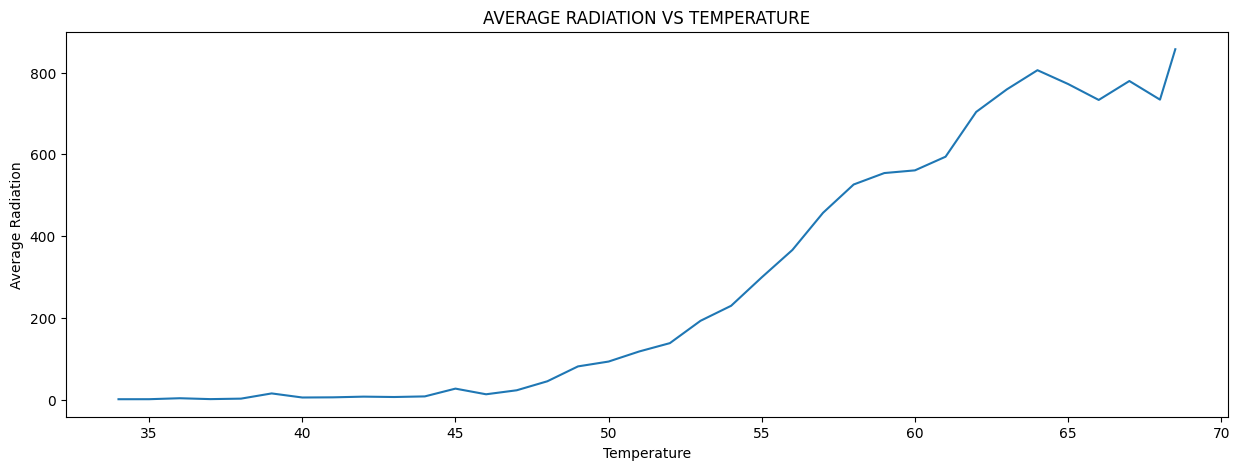

In [ ]:
# How is temperature varying with Radiation?

plt.figure(figsize=(15,5))
temp_radiation = solar.groupby(by='Temperature')['Radiation'].mean()
temp_radiation.plot(kind = 'line')
plt.xlabel('Temperature')
plt.ylabel('Average Radiation')
plt.title('AVERAGE RADIATION VS TEMPERATURE')
plt.show()

# As the temperature increases, the radiation value also increases. Till 8 degrees, the radiation is almost constant.

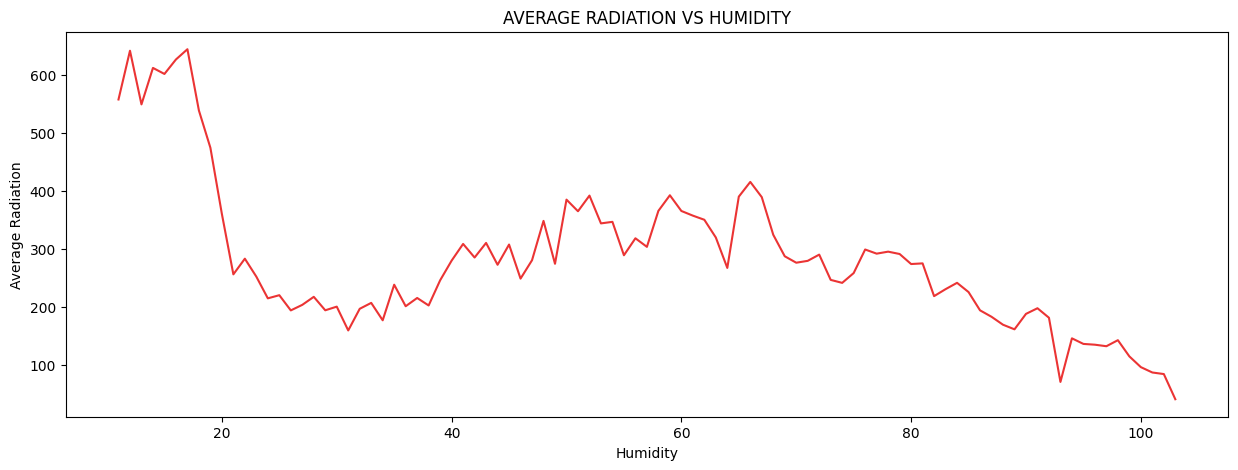

In [ ]:
# How is humidity varying with Radiation?

plt.figure(figsize=(15,5))
pressure_radiation = solar.groupby(by='Humidity')['Radiation'].mean()
pressure_radiation.plot(kind = 'line',color = '#eb3434')
plt.xlabel('Humidity')
plt.ylabel('Average Radiation')
plt.title('AVERAGE RADIATION VS HUMIDITY')
plt.show()

# As the humidity increases, the radiation value decreases


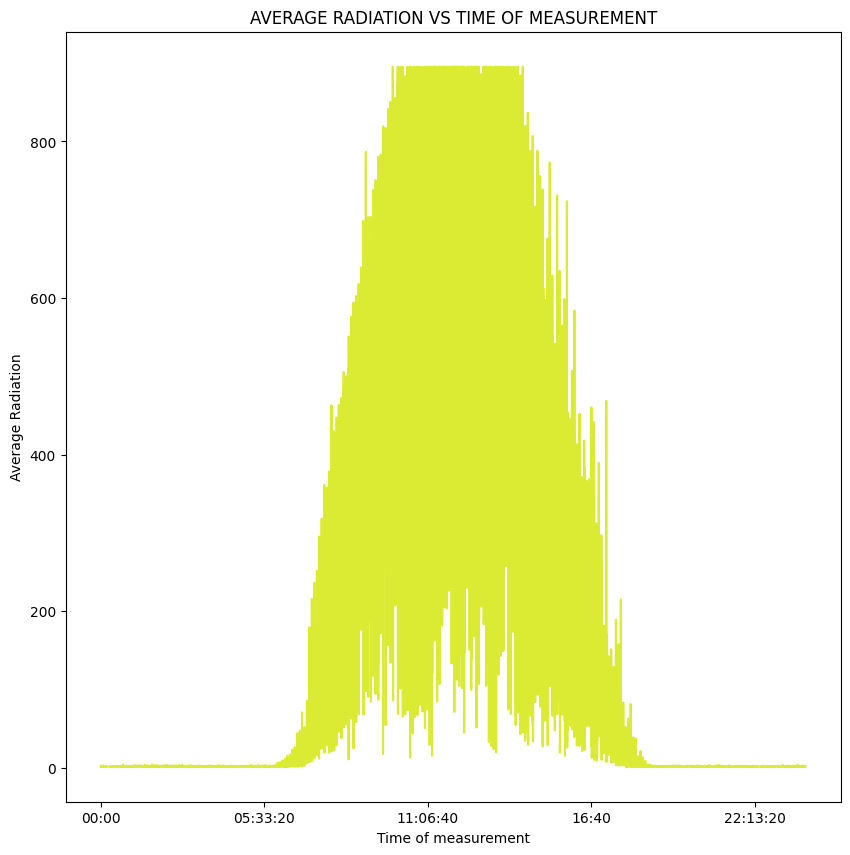

In [ ]:
# How does radiation vary from the time of measurement

plt.figure(figsize=(10,10))
radiation_sunrise = solar.groupby(by='Time')['Radiation'].mean()
radiation_sunrise.plot(kind = 'line',color = '#dbeb34')
plt.xlabel('Time of measurement')
plt.ylabel('Average Radiation')
plt.title('AVERAGE RADIATION VS TIME OF MEASUREMENT')
plt.show()

# Highest generation is observed during the time 10 AM and 3 PM.
# The generation starts from around 6 AM in the morning and ends around 6.30 PM

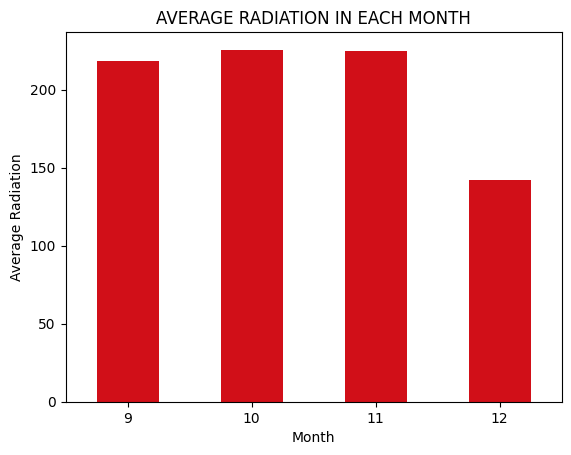

In [ ]:
# What is the average radiation observed in each month

month_radiation = solar.groupby(solar['Date'].dt.month)['Radiation'].mean()
month_radiation.plot(kind = 'bar',color='#d10f18')
plt.xlabel('Month')
plt.ylabel('Average Radiation')
plt.title('AVERAGE RADIATION IN EACH MONTH')
plt.xticks(rotation = 0)
plt.show()

# Average Radiation drops significantly in the month of december

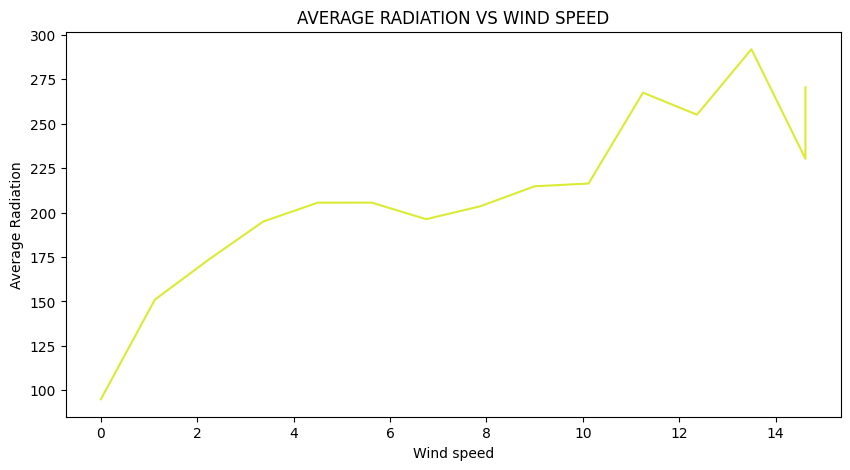

In [ ]:
# How does Radiation vary with the wind speed?

plt.figure(figsize=(10,5))
radiation_sunrise = solar.groupby(by='Speed')['Radiation'].mean()
radiation_sunrise.plot(kind = 'line',color = '#dbeb34')
plt.xlabel('Wind speed')
plt.ylabel('Average Radiation')
plt.title('AVERAGE RADIATION VS WIND SPEED')
plt.show()

# As the wind speed increases, the average radiation also increases

In [ ]:
y_main_solar = solar['Radiation']
x_main_solar = solar.copy()

In [ ]:
solar.drop(columns=['Radiation','Date','Time','TimeSunRise','TimeSunSet'],inplace=True,axis=1)

In [ ]:
X_main_solar_num = x_main_solar.select_dtypes(include='number')
X_main_solar_num.drop('Radiation',inplace=True,axis=1)
ss=MinMaxScaler()
scaled_solar = ss.fit_transform(X_main_solar_num)

In [ ]:
scaled_solar = pd.DataFrame(scaled_solar,columns=X_main_solar_num.columns,index = X_main_solar_num.index)

In [ ]:
scaled_solar.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,0.666667,0.583333,0.619565,0.081878,0.307798
1,0.463768,0.666667,0.923913,0.445762,0.692202
2,0.376812,0.708333,0.489130,0.367484,0.230506
3,0.666667,0.666667,0.891304,0.118525,0.153899
4,0.202899,0.000000,1.000000,0.546041,0.153899


In [ ]:
X_main_solar = scaled_solar.copy()
X_main_solar.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,0.666667,0.583333,0.619565,0.081878,0.307798
1,0.463768,0.666667,0.923913,0.445762,0.692202
2,0.376812,0.708333,0.489130,0.367484,0.230506
3,0.666667,0.666667,0.891304,0.118525,0.153899
4,0.202899,0.000000,1.000000,0.546041,0.153899


In [ ]:
X_train_solar, X_test_solar, y_train_solar,y_test_solar = train_test_split(X_main_solar,y_main_solar,test_size=0.3,random_state=101)

In [ ]:
print('Shape of X_train is:', X_train_solar.shape)
print('Shape of X_test is:', X_test_solar.shape)
print('Shape of y_train is:', y_train_solar.shape)
print('Shape of y_test is:', y_test_solar.shape)

Shape of X_train is: (18303, 5)
Shape of X_test is: (7845, 5)
Shape of y_train is: (18303,)
Shape of y_test is: (7845,)


#### Linear Regression

In [ ]:
lin = LinearRegression()
model_lin = lin.fit(X_train_solar,y_train_solar)
y_pred_train = model_lin.predict(X_train_solar)
y_pred_test = model_lin.predict(X_test_solar)

In [ ]:
mape_train = mean_absolute_percentage_error(y_train_solar,y_pred_train)
mape_test = mean_absolute_percentage_error(y_test_solar,y_pred_test)

mse_train = mean_squared_error(y_train_solar,y_pred_train)
mse_test = mean_squared_error(y_test_solar,y_pred_test)

r2_score_train = r2_score(y_train_solar,y_pred_train)
r2_score_test = r2_score(y_test_solar,y_pred_test)

In [ ]:
print('MAPE of train set is ',mape_train)
print('MAPE of test set is ',mape_test)
print('-'*20)
print('MSE of train set is ',mse_train)
print('MSE of test set is ',mse_test)
print('-'*20)
print('R2 of train set is ',r2_score_train)
print('R2 of test set is ',r2_score_test)

MAPE of train set is  42.180126441992186
MAPE of test set is  43.503637625696015
--------------------
MSE of train set is  39300.55577835131
MSE of test set is  38740.18320395528
--------------------
R2 of train set is  0.5772843806389429
R2 of test set is  0.5699659984854016


In [ ]:
X_train_solar_cons = sm.add_constant(X_train_solar)
sm_model = sm.OLS(y_train_solar,X_train_solar_cons)
results = sm_model.fit()

C:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Radiation   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     4997.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:37:51   Log-Likelihood:            -1.2278e+05
No. Observations:               18303   AIC:                         2.456e+05
Df Residuals:                   18297   BIC:                         2.456e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -342.4248      9.779    -35.016      0.000    -361.593    -323.257
Temperature             1286.2716      9.082    141.625      0.000    1268.470    1304.074
Pressure                -200.4771      7.869    -25.475      0.000    -215.902    -185.052
Humidity                 -31.5083      5.695     -5.533      0.000     -42.671     -20.346
WindDirection(Degrees)   -83.5817      6.224    -13.428      0.000     -95.782     -71.381
Speed                    150.1115      6.984     21.494      0.000     136.422     163.801
==============================================================================
Omnibus:                      996.815   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1231.608
Skew:                           0.554   Prob(JB):                    3.63e-268
Kurtosis:                       3.623   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Random Forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_solar, y_train_solar)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_regressor = grid_search.best_estimator_

y_pred_train = best_rf_regressor.predict(X_train_solar)
y_pred_test = best_rf_regressor.predict(X_test_solar)

mape_train = mean_absolute_percentage_error(y_train_solar,y_pred_train)
mape_test = mean_absolute_percentage_error(y_test_solar,y_pred_test)

mse_train = mean_squared_error(y_train_solar,y_pred_train)
mse_test = mean_squared_error(y_test_solar,y_pred_test)

r2_train = r2_score(y_train_solar,y_pred_train)
r2_test = r2_score(y_test_solar,y_pred_test)

print('MAPE of train set is ',mape_train)
print('MAPE of test set is ',mape_test)
print('-'*20)
print('MSE of train set is ',mse_train)
print('MSE of test set is ',mse_test)
print('-'*20)
print('R2 of train set is ',r2_score_train)
print('R2 of test set is ',r2_score_test)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
MAPE of train set is  7.274624372180487
MAPE of test set is  12.966432735600385
--------------------
MSE of train set is  7117.484841073732
MSE of test set is  23696.97221802315
--------------------
R2 of train set is  0.796275204544073
R2 of test set is  0.722957797301607


XG Boost

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'reg_lambda':[0.1,0.2,0.3,0.5,0.6,0.7,0.9,1.0],
    'gamma':[0.1,0.2,0.3,0.5,0.6,0.7,0.9,1.0]
}

In [ ]:
xgb_reg = xgb.XGBRegressor()

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_solar, y_train_solar)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_xgb_reg = xgb.XGBRegressor(**best_params)
best_xgb_reg.fit(X_train_solar, y_train_solar)

y_pred_train = best_xgb_reg.predict(X_train_solar)
y_pred_test = best_xgb_reg.predict(X_test_solar)

mape_train = mean_absolute_percentage_error(y_train_solar,y_pred_train)
mape_test = mean_absolute_percentage_error(y_test_solar,y_pred_test)

mse_train = mean_squared_error(y_train_solar,y_pred_train)
mse_test = mean_squared_error(y_test_solar,y_pred_test)

r2_train = r2_score(y_train_solar,y_pred_train)
r2_test = r2_score(y_test_solar,y_pred_test)

print('MAPE of train set is ',mape_train)
print('MAPE of test set is ',mape_test)
print('-'*20)
print('MSE of train set is ',mse_train)
print('MSE of test set is ',mse_test)
print('-'*20)
print('R2 of train set is ',r2_score_train)
print('R2 of test set is ',r2_score_test)

Best Hyperparameters: {'gamma': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 0.7}
MAPE of train set is  12.102571671531955
MAPE of test set is  14.09980382021027
--------------------
MSE of train set is  15221.327931576165
MSE of test set is  24334.261354681752
--------------------
R2 of train set is  0.796275204544073
R2 of test set is  0.722957797301607
